In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
COVID19 IMPACT ON DIGITAL LEARNING
</h1></div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
TABLE OF CONTENT
</h1></div>

[1.PROBLEM_STATEMENT](#PROBLEM_STATEMENT)<br>
[2.OUR OBJECTIVE](#OUR_OBJECTIVE)<br>
[3.LOAD_DATA](#LOAD_DATA)<br>
[4.DATA_PREPROCESSING](#DATA_PREPROCESSING)<br>
[5.DISTRICTS](#DISTRICTS)<br>
[5.1.MISSING](#MISSING)<br>
[5.2.ORDER_OF_STATES](#ORDER_OF_STATES)<br>
[5.3.LOCALE](#LOCALE)<br>
[5.4.pct_free/reduced](#pct_free/reduced)<br>
[5.5.PP_TOTAL_RAW_DISTRIBUTION](#PP_TOTAL_RAW_DISTRIBUTION)<br>
[5.6.PCT_BLACK/HISPANIC DISTRIBUTION](#PCT_BLACK/HISPANIC_DISTRIBUTION)<br>
[5.7.PCT_FREE/REDUCED_DISTRIBUTION](#PCT_FREE/REDUCED_DISTRIBUTION)<br>
[5.8.COUNTRY_CONNECTIONS_RATIO_DISTRIBUTION](#COUNTRY_CONNECTIONS_RATIO_DISTRIBUTION)<br>
[6.PRODUCT](#PRODUCT)<br>
[6.1.MISSING](#MISSING1)<br>
[6.2.STATE'S COUNT](#STATE'S_COUNT)<br>
[6.3.Sector(s)](#Sector(s))<br>
[6.4.COMPARE ESSENTIAL FUNCTION](#COMPARE_ESSENTIAL_FUNCTION)<br>
[6.5.COMBINE DATA](#COMBINE_DATA)<br>
[6.6.states with best connections](#states_with_best_connections)<br>
[6.7.SCHOOLS IN LOCALE AND STATE](#SCHOOLS_IN_LOCALE_AND_STATE)<br>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
PROBLEM STATEMENT</h1></div>
<a id="PROBLEM_STATEMENT"></a>

<div><span style="color:black;fontsize:200%;font-family:'Times New Roman';"><b>The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.</span></div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
OUR OBJECTIVE</h1></div>
<a id="OUR_OBJECTIVE"></a>

<span style="color:black;fontsize:200%;font-family:'Times New Roman';"><b>We will work to uncover trends in digital learning. Accomplish this with data analysis about how engagement with digital learning relates to factors like district demographics, broadband access, and state/national level policies and events. Then, we will propose a solution to these educational inequities.It will be about policies and practices that close the digital divide. With a better understanding of digital learning trends, we may help reverse the long-term learning loss among America’s most vulnerable, making education more equitable.</span>

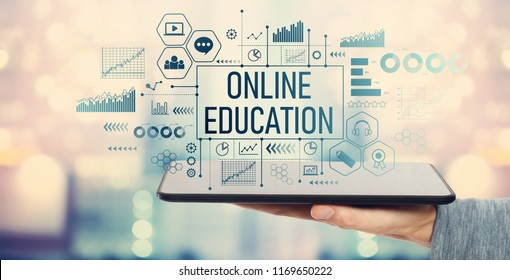

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import glob

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
LOAD DATA</h1></div>
<a id="LOAD_DATA"></a>

In [ ]:
dist=pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")

In [ ]:
dist.head()

| Name | Description |
| :--- | :----------- |
| district_id | The unique identifier of the school district |
| state | The state where the district resides in |
| locale | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See [Locale Boundaries User's Manual](https://eric.ed.gov/?id=ED577162) for more information. |
| pct_black/hispanic | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
| pct_free/reduced | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data |
| county_connections_ratio | `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See [FCC data](https://www.fcc.gov/form-477-county-data-internet-access-services) for more information. |
| pp_total_raw | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district. |


In [ ]:
products = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")

In [ ]:
products.head()

| Name | Description |
| :--- | :----------- |
| LP ID| The unique identifier of the product |
| URL | Web Link to the specific product |
| Product Name | Name of the specific product |
| Provider/Company Name | Name of the product provider |
| Sector(s) | Sector of education where the product is used |
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled |

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
DATA PREPROCESSING</h1></div>
<a id="DATA_PREPROCESSING"></a>

In [ ]:
dist["pp_total_raw"]=dist["pp_total_raw"].map(lambda x:str(x).strip("]["))
dist["pp_total_raw"]=dist["pp_total_raw"].map(lambda x:x.split(",")[0])

dist['pct_black/hispanic']=dist['pct_black/hispanic'].map(lambda x:str(x).strip("]["))
dist['pct_black/hispanic']=dist['pct_black/hispanic'].map(lambda x:x.split(",")[0])

dist['pct_free/reduced']=dist['pct_free/reduced'].map(lambda x:str(x).strip("]["))
dist['pct_free/reduced']=dist['pct_free/reduced'].map(lambda x:x.split(",")[0])

dist["county_connections_ratio"]=dist["county_connections_ratio"].map(lambda x:str(x).strip("]["))
dist["county_connections_ratio"]=dist["county_connections_ratio"].map(lambda x:x.split(",")[0])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
DISTRICTS</h1></div>
<a id="DISTRICTS"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
MISSING</h1></div>
<a id="MISSING"></a>

In [ ]:
plt.figure(figsize=(15,7))                                      # textcoords:'offset points','offset pixels'
sns.set(style="dark")
plt.gca()
m=sns.barplot(dist.isnull().sum().index,dist.isnull().sum().values,color="lightblue",edgecolor="0.2")
for i in m.patches:
    plt.annotate(int(i.get_height()),(i.get_x(),i.get_height()+10),bbox={"color":"white"},va="center")
plt.xlabel("FEATURES",fontdict={"fontsize":15,"family":'serif'})
plt.ylabel("MISSING VALUES COUNTS",fontdict={"fontsize":15,"family":'serif'})
plt.margins(0.2)
plt.grid(color="lightgrey")
plt.xticks(rotation=90,family='serif')
plt.title("MISSING VALUES",fontdict={"fontsize":30,"family":'serif'})
plt.show()

From the above observation we understand that only two features are with 'NULL' or 'NaN' values with 57 count 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
ORDER OF STATES</h1></div>
<a id="ORDER_OF_STATES"></a>

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y="state",data=dist,order=dist.state.value_counts().index)
plt.title("STATE'S COUNT",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("COUNT'S",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("STATE'S",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.yticks(fontsize=15)
plt.show()

The above observation show the state representation

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
LOCALE</h1></div>
<a id="LOCALE"></a>

In [ ]:
fig, ax  = plt.subplots(figsize=(15,6))
ax.pie(dist.locale.value_counts().values,explode=[0,0,0,0.3],labels=dist.locale.value_counts().index,autopct='%1.0f%%'
,pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.title("LOCALE",fontdict={"fontsize":20,"family":'serif'})
plt.show()

from above observation we understand that percent of locale contribution

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
pct_free/reduced</h1></div>
<a id="pct_free/reduced"></a>

In [ ]:
plt.figure(figsize=(15,7))                                     
sns.set(style="dark")
m=sns.countplot(data= dist, x = "pct_free/reduced",edgecolor="0.2",zorder=3)
for i in m.patches:
    plt.annotate(int(i.get_height()),(i.get_x(),i.get_height()),bbox={"color":"white"},va="center")
plt.title("PCT_FREE/REDUCED",fontdict={"fontsize":20,"family":'serif'})
plt.xlabel("PCT_FREE/REDUCED",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("COUNT'S",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.grid(color="lightgrey")
plt.show()

From above observation we understand the the count of people needed of cost reduction or eligible for scholar 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
PP_TOTAL_RAW DISTRIBUTION</h1></div>
<a id="PP_TOTAL_RAW_DISTRIBUTION"></a>

In [ ]:
plt.figure(figsize=(15,7))                                     
sns.distplot(dist["pp_total_raw"])
plt.title("PP_TOTAL_RAW DISTRIBUTION",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("PP_TOTAL_RAW",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("DISTRIBUTION",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.grid(color="lightgrey")
plt.show()

From above observation we understand that data are not distributed normally 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
PCT_BLACK/HISPANIC DISTRIBUTION</h1></div>
<a id="PCT_BLACK/HISPANIC_DISTRIBUTION"></a>

In [ ]:
plt.figure(figsize=(15,7))                                     
sns.distplot(dist['pct_black/hispanic'])
plt.title("PCT_BLACK/HISPANIC DISTRIBUTION",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("PCT_BLACK/HISPANIC",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("DISTRIBUTION",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.grid(color="lightgrey")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
PCT_FREE/REDUCED DISTRIBUTION</h1></div>
<a id="PCT_FREE/REDUCED_DISTRIBUTION"></a>

In [ ]:
plt.figure(figsize=(15,7))                                     
sns.distplot(dist['pct_free/reduced'])
plt.title("PCT_FREE/REDUCED DISTRIBUTION",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("PCT_FREE/REDUCED",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("DISTRIBUTION",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.grid(color="lightgrey")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
COUNTRY_CONNECTIONS_RATIO DISTRIBUTION</h1></div>
<a id="COUNTRY_CONNECTIONS_RATIO_DISTRIBUTION"></a>

In [ ]:
plt.figure(figsize=(15,7))                                     
sns.distplot(dist["county_connections_ratio"])
plt.title("COUNTRY_CONNECTIONS_RATIO DISTRIBUTION",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("COUNTRY_CONNECTIONS_RATIO",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("DISTRIBUTION",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.grid(color="lightgrey")
plt.show()

In [ ]:
from wordcloud import WordCloud
text=" ".join(dist["state"].dropna())
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
PRODUCT</h1></div>
<a id="PRODUCT"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
MISSING</h1></div>
<a id="MISSING1"></a>

In [ ]:
plt.figure(figsize=(15,7))                                      # textcoords:'offset points','offset pixels'
sns.set(style="dark")
plt.gca()
m=sns.barplot(products.isnull().sum().index,products.isnull().sum().values,color="lightblue",edgecolor="0.2")
for i in m.patches:
    plt.annotate(int(i.get_height()),(i.get_x(),i.get_height()+1),bbox={"color":"white"},va="center")
plt.xlabel("FEATURES",fontdict={"fontsize":15,"family":'serif'})
plt.ylabel("MISSING VALUES COUNTS",fontdict={"fontsize":15,"family":'serif'})
plt.margins(0.2)
plt.grid(color="lightgrey")
plt.xticks(rotation=90,family='serif')
plt.title("MISSING VALUES",fontdict={"fontsize":30,"family":'serif'})
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
STATE'S COUNT</h1></div>
<a id="STATE'S_COUNT"></a>

In [ ]:
top=products["Provider/Company Name"].value_counts(ascending=False).head(10)
plt.figure(figsize=(15,7))
sns.barplot(top.values,top.index)
plt.title("STATE'S COUNT",fontdict={"fontsize":30,"family":'serif'})
plt.xlabel("COUNT'S",fontdict={"fontsize":20,"family":'serif'})
plt.ylabel("STATE'S",fontdict={"fontsize":20,"family":'serif',"color":"black"})
plt.yticks(fontsize=15)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Sector(s)</h1></div>
<a id="Sector(s)"></a>

In [ ]:
fig, ax  = plt.subplots(figsize=(15,6))
ax.pie(products["Sector(s)"].value_counts().values,labels=products["Sector(s)"].value_counts().index,explode=[0,0,0,0,0.3]
       ,autopct='%1.0f%%',pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.title("Sector(s)",fontdict={"fontsize":20,"family":'serif'})
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
COMPARE ESSENTIAL FUNCTION</h1></div>
<a id="COMPARE_ESSENTIAL_FUNCTION"></a>

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.barh(products["Primary Essential Function"].value_counts().head(5).index,
        products["Primary Essential Function"].value_counts().head(5).values)
plt.subplot(212)
plt.pie(products["Primary Essential Function"].value_counts().head(5),
        labels=products["Primary Essential Function"].value_counts().head(5).index)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
COMBINE DATA</h1></div>
<a id="COMBINE_DATA"></a>

In [ ]:
dist_com=dist
prod_com=products.iloc[:233,:]
comb_data=pd.concat([dist_com,prod_com],axis=1)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
states with best connections</h1></div>
<a id="states_with_best_connections"></a>

In [ ]:
comb_data["county_connections_ratio"]=comb_data["county_connections_ratio"].astype("float32")
state_conn=comb_data.groupby("state")["county_connections_ratio"].mean()

In [ ]:
plt.figure(figsize=(15,9))
plt.style.use(plt.style.available[0])
plt.bar(state_conn.index,state_conn.values,zorder=3)
plt.xlabel("STATES")
plt.ylabel("AVERAGE CONNECTION")
plt.xticks(rotation=90)
plt.grid()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
SCHOOLS IN LOCALE AND STATE</h1></div>
<a id="SCHOOLS_IN_LOCALE_AND_STATE"></a>

In [ ]:
import plotly.express as px 
state_locale=dist.groupby("state")["locale"].value_counts().to_frame().rename(columns={"locale": "number of school districts"}).reset_index()
fig = px.treemap(state_locale, path=['state', 'locale'], values='number of school districts',color='number of school districts', 
                 color_continuous_scale='piyg',
                title=('State-Wise School District Distribution in Locale'))
fig.update_layout(title_x=0.5)
                
fig.show()